In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X1 = np.random.randn(100).reshape(-1,1)
X2 = np.random.randn(100).reshape(-1,1)
y = X1*2 
#X = np.concatenate((X1,X2),axis = 1)
X = X1

In [3]:
class LinearRegression:
    
    def __init__(self, tolerance = 1e-05, max_epoch = 1000):
        
        self.tolerance = tolerance
        self.max_epoch = max_epoch
        self.history = []
        
    def cost(self, X,y,weights):
        return np.sum((X.dot(weights.reshape(X.shape[1],-1))-y)**2)/len(X)
    
    def gradient(self, X,y,weights):
        return X.T.dot((X.dot(weights.reshape(X.shape[1],-1))-y)).reshape(X.shape[1])/len(X)
        
    def fit(self,X,y):
        ones = np.array([1]*len(X)).reshape(len(X),-1)
        self.X = np.concatenate([ones,X],axis = 1)
        self.y = y.reshape(len(X),-1)
        self.weights = np.random.randn(self.X.shape[1])
        step_sizes = np.logspace(1,1e-10,12)
        
        weights_magnitude = np.sqrt(np.sum(self.weights**2))
        previous_iter_weights_magnitude = np.Inf
        count = 0
        self.history.append(self.weights)

        while abs(previous_iter_weights_magnitude - weights_magnitude) > self.tolerance and count < self.max_epoch:
            
            previous_iter_weights_magnitude = weights_magnitude.copy()
            count += 1
            gradient = self.gradient(self.X, self.y, self.weights)
            print('cost is {}'.format(self.cost(self.X, self.y, self.weights)))
            
            tmp_weights = []
            tmp_costs = []
            
            for step in step_sizes:
                new_weight = self.weights - self.gradient(self.X,self.y,self.weights)*step
                tmp_weights.append(new_weight)
                tmp_costs.append(self.cost(self.X,self.y,new_weight))
            


            self.weights = tmp_weights[tmp_costs.index(min(tmp_costs))]
            self.history.append(self.weights)
            weights_magnitude = np.sqrt(np.sum(self.weights**2))
            
    def predict(self,X):
        
        ones = np.array([1]*len(X)).reshape(len(X),-1)
        X = np.concatenate([ones,X],axis = 1)
        
        return(X.dot(self.weights.reshape(X.shape[1],-1)))

In [4]:
testLinearReg = LinearRegression()

In [5]:
testLinearReg.fit(X,y)

cost is 5.017999486214571
cost is 0.059479749733967274
cost is 0.0007677765818810844
cost is 9.988293129204927e-06
cost is 1.30029751365853e-07
cost is 1.6928549150724392e-09
cost is 2.203935893213915e-11


In [6]:
preds = testLinearReg.predict(X)

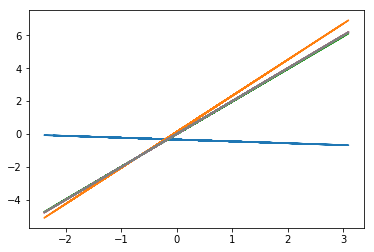

In [7]:
ones = np.array([1]*len(X)).reshape(len(X),-1)
X = X1
X = np.concatenate([ones,X], axis = 1)
for weights in testLinearReg.history:
    
    plt.plot(X[:,1],X.dot(weights.reshape(X.shape[1],-1)))